In [4]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("winemag-data-130k-v2.csv", index_col=0)
df

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [6]:
text = " ".join(review for review in df.description)
print("There are {} words in the combination of all review.".format(len(text)))

There are 31661073 words in the combination of all review.


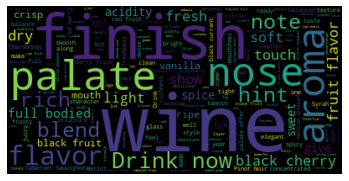

In [7]:
wordcl = WordCloud().generate(text)
plt.imshow(wordcl, interpolation='bilinear')
plt.axis('off')
plt.show()

In [10]:
# get rid of the less important words using the set called stopwords
stopwords = set(STOPWORDS)
# view stopwords in the set
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [14]:
# add other items we do not need to visualize into stopwords
stopwords.update("drink", "now", "wine", "made", "the")

Add a few more styling parameters:
background_color: changes the default background
max_font_size: control the size of the largest word
max_words: to present the specified number of words in the wordcloud

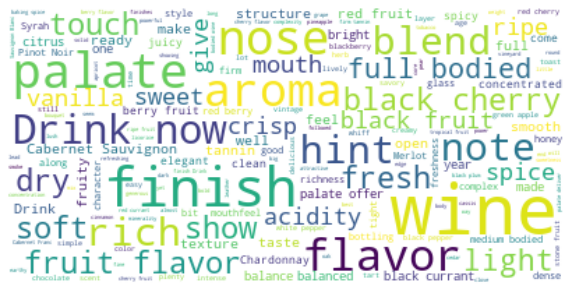

In [15]:
wordcl = WordCloud(stopwords=stopwords, background_color="white", max_font_size=50, max_words=2000).generate(text)
plt.figure(figsize=(10, 8))
plt.imshow(wordcl, interpolation='bilinear')
plt.axis('off')
plt.show()

# Using a custom shape instead of the default rectangular one 

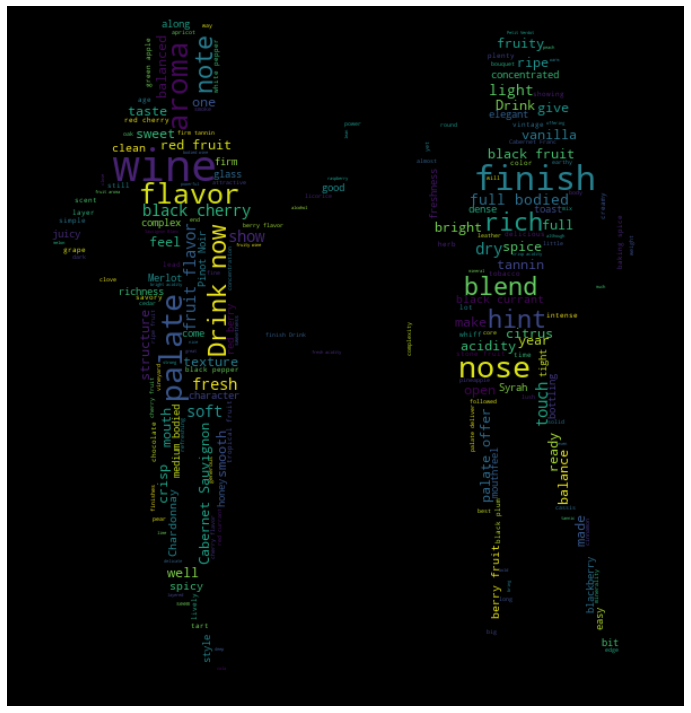

In [16]:
mask = np.array(Image.open("img/two-women.png"))

# use the mask in wordcloud module
wc = WordCloud(background_color='black', mask=mask, mode='RGB',
              width=1000, max_words=200, height=1000, random_state=1)

wc.generate(text)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

use white words with a black background instead


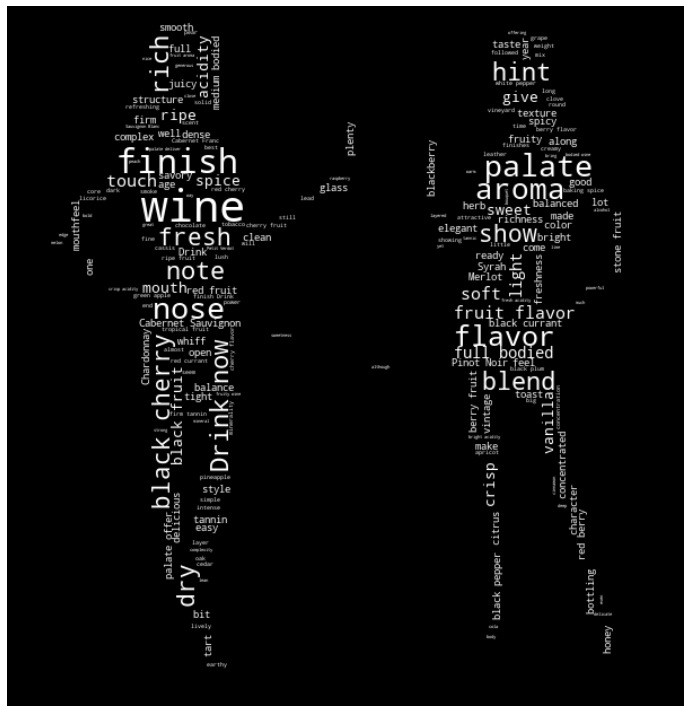

In [17]:
wc = WordCloud(background_color='black', mask=mask,
              mode='RGB', color_func=lambda *args, **kwargs: "white",
              width=1000, max_words=200, height=1000, random_state=1)

wc.generate(text)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

Get a more accurate shape using contour

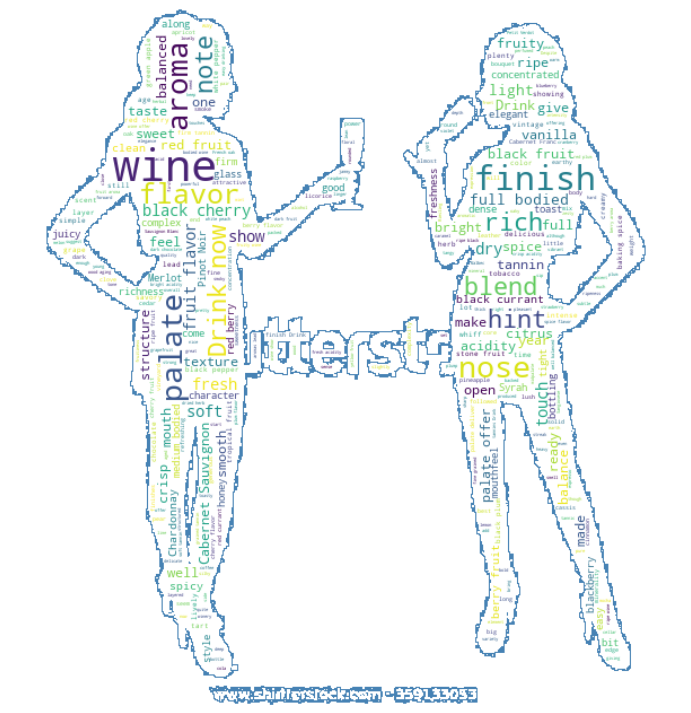

In [18]:
wc = WordCloud(background_color='white', mask=mask, mode='RGB',
              width=1000, max_words=1000, height=1000, random_state=1, contour_width=1,
              contour_color='steelblue')

wc.generate(text)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

generate the same effect using a different image

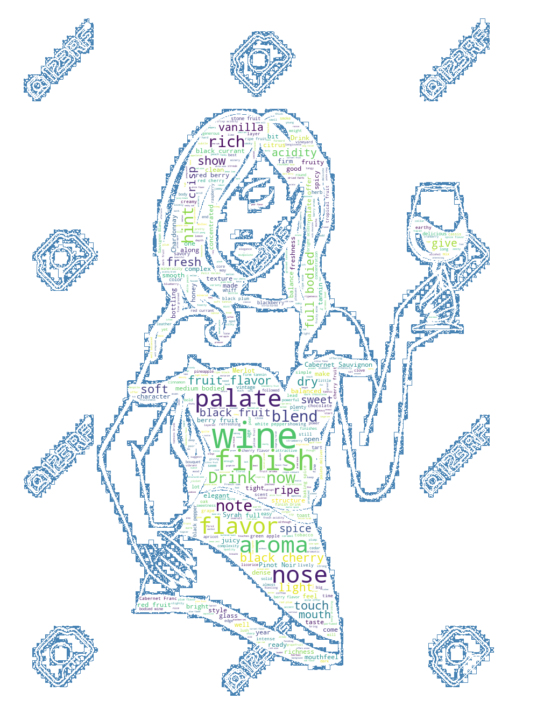

In [21]:
mask1 = np.array(Image.open("img/stylish.jpg"))

wc = WordCloud(background_color='white', mask=mask1, mode='RGB',
              width=1000, max_words=1000, height=1000, contour_width=1,
              contour_color='steelblue')

wc.generate(text)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

using a colored picture instead and make color of words as in the pictures

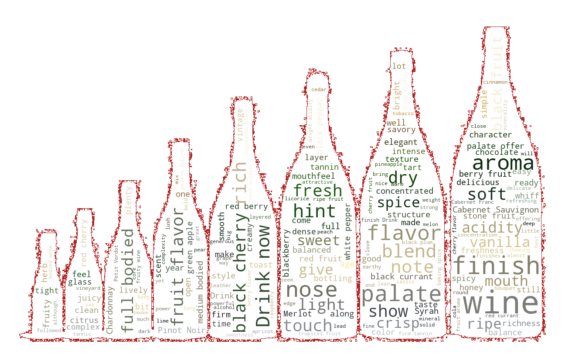

In [24]:
bottles = np.array(Image.open("img/bottles.jpg"))
wc = WordCloud(background_color='white', mask=bottles,
              contour_width=1, contour_color='firebrick')
wc.generate(text)

image_colors = ImageColorGenerator(bottles)
wc.recolor(color_func=image_colors)

plt.figure(figsize=[10, 10])
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

finally save the image 

In [26]:
wc.to_file("img/wine.png")